# Regresión Logística Multinomial
## Sergio García Prado

## Ajuste Multinomial
Utilizando las tablas de datos en los ficheros datos1 y datos2 ajusta un modelo de regresión
logística multinomial para predecir el grupo de pertenencia (Y) en función de las variables
explicativas (X1,X2) (Para ello utiliza una modelización tipo Y~X1+X2).

Obtén intervalos de confianza al 95% para los coeficientes de las variables explicativas en el
modelo ajustado por el método de Wald y por el correspondiente a la verosimilitud perfil.

Obtén intervalos de confianza al 95% para la probabilidad de pertenecer al grupo 2 en relación
a la probabilidad de pertenecer al grupo 1 en los valores observados de las variables explicativas.

Para los valores observados de las variables explicativas obtén estimaciones de la probabilidad
de pertenecer a cada uno de los tres grupos.

Clasifica cada individuo al grupo para el que tiene mayor probabilidad a posteriori de pertenecer
y evalúa la clasificación obtenida

Ajusta otros modelos logísticos a los datos y selecciona el que parezca más interesante.

In [1]:
rm(list = ls())

In [2]:
library(nnet)
library(MASS)
library(VGAM)

Loading required package: stats4
Loading required package: splines


### Datos 1

In [3]:
datos1 <- read.table('data/datos1.txt', header = TRUE)
colnames(datos1)[colnames(datos1) == 'G'] <- 'Y'
datos1$Y <- as.factor(datos1$Y)

In [4]:
head(datos1)

X1,X2,Y
0.31,-0.46,1
0.78,4.47,1
-0.21,-0.54,1
0.19,1.65,1
-0.24,0.24,1
1.30,7.59,1


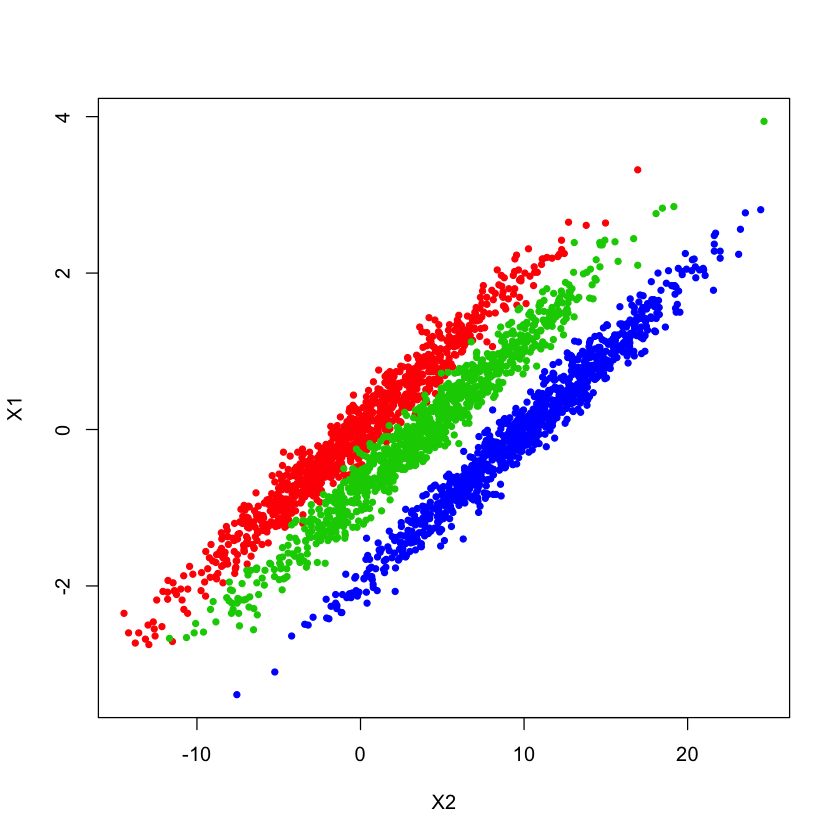

In [5]:
plot(X1 ~ X2, col = as.numeric(Y) + 1, data = datos1, pch=20)

#### Ajuste del Modelo

In [6]:
fit.datos1 <- multinom(Y ~ X1 + X2, data=(datos1), Hess = TRUE)
summary(fit.datos1)

# weights:  12 (6 variable)
initial  value 3295.836866 
iter  10 value 429.245499
iter  20 value 128.073643
iter  30 value 122.645527
iter  40 value 122.583734
iter  50 value 122.559239
iter  60 value 122.504338
iter  70 value 122.493994
iter  80 value 122.486304
iter  90 value 122.480082
iter 100 value 122.473220
final  value 122.473220 
stopped after 100 iterations


Call:
multinom(formula = Y ~ X1 + X2, data = (datos1), Hess = TRUE)

Coefficients:
  (Intercept)        X1        X2
2   -8.205141 -21.04663  4.201596
3  -75.721683 -69.37726 13.964826

Std. Errors:
  (Intercept)        X1       X2
2   0.6574849  1.637257 0.325661
3  48.3473244 34.023324 7.052260

Residual Deviance: 244.9464 
AIC: 256.9464 

#### Intervalos de Confianza para Coeficientes

##### Wald

In [7]:
Rcmdr::Confint(fit.datos1)

,Estimate,2.5 %,97.5 %
2:(Intercept),-8.205141,-9.4937880,-6.916495
2:X1,-21.046627,-24.2555913,-17.837663
2:X2,4.201596,3.5633122,4.839880
3:(Intercept),-75.721683,-170.4806980,19.037331
3:X1,-69.377263,-136.0617535,-2.692773
3:X2,13.964826,0.1426511,27.787001


##### Verosimilitud Perfil

No estimable debido a la propiedad de separación completa que se da en los datos entre el la tercera clase y el resto. Esto produce una verosimilitud infinita, lo cual impide realizar cálculos con ella.

#### Intervalo de Confianza para la probabilidad de pertenecer al grupo 2 frente a la de pertencer al 1

In [8]:
# TODO

#### Probabilidades de Pertenencia

In [9]:
prediction.probability.datos1 <- predict(fit.datos1, type="probs")

In [10]:
head(prediction.probability.datos1)

1,2,3
0.9999999,5.802859e-08,9.645189e-46
0.9971007,2.899318e-03,5.267069e-30
0.9976575,2.342453e-03,1.464836e-30
0.9948897,5.110334e-03,2.480461e-29
0.8952539,1.047461e-01,5.665514e-25
0.9752928,2.470721e-02,9.259832e-27


#### Predicciones

In [11]:
prediction.datos1 <- as.factor(apply(prediction.probability.datos1,1, which.max))

In [12]:
summary(prediction.datos1)

1    2    3 
1001 1000  999

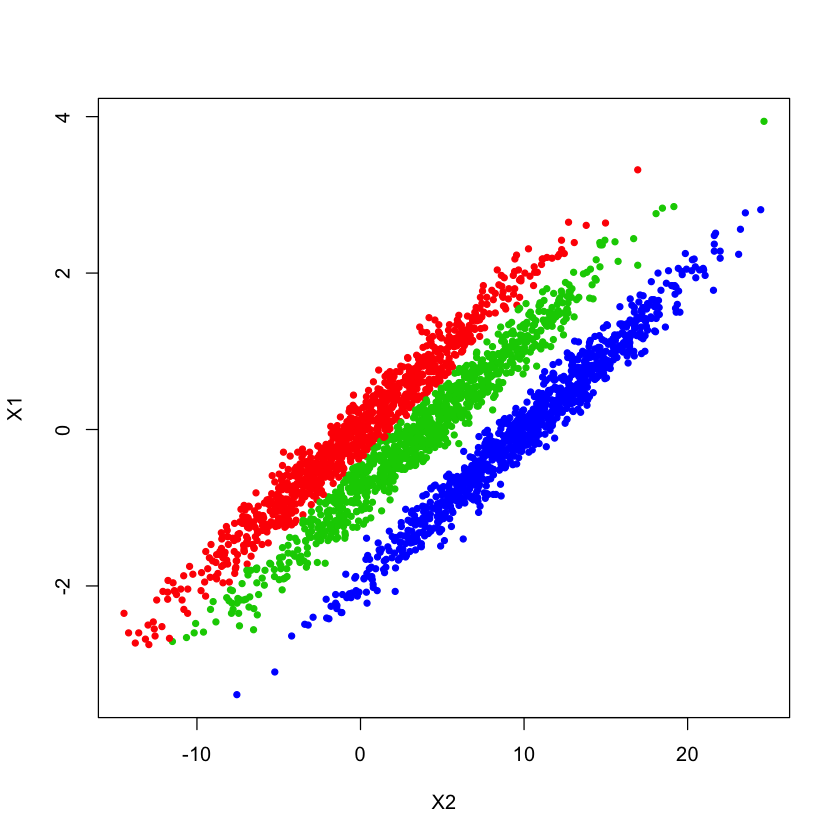

In [13]:
plot(X1 ~ X2, col = as.numeric(prediction.datos1) + 1, data = datos1, pch = 20)

#### Otros Modelos

In [14]:
fit.datos1.ord <- polr(Y ~ X1 + X2, data=datos1, Hess = TRUE)
summary(fit.datos1.ord)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Call:
polr(formula = Y ~ X1 + X2, data = datos1, Hess = TRUE)

Coefficients:
     Value Std. Error t value
X1 -22.010     1.6226  -13.56
X2   4.396     0.3225   13.63

Intercepts:
    Value    Std. Error t value 
1|2   8.5833   0.6531    13.1430
2|3  30.7540   2.3119    13.3025

Residual Deviance: 249.2769 
AIC: 257.2769 

In [15]:
AIC(fit.datos1)

[1] 256.9464

In [16]:
AIC(fit.datos1.ord)

[1] 257.2769

### Datos 2

In [17]:
datos2 <- read.table('data/datos2.txt', header = TRUE)
datos2$Y <- as.factor(datos2$Y)

In [18]:
head(datos2)

X1,X2,Y
-4.03,-3.30,1
-0.43,-0.29,1
-1.40,0.06,1
-3.64,-3.00,1
0.06,1.17,1
-0.55,1.20,1


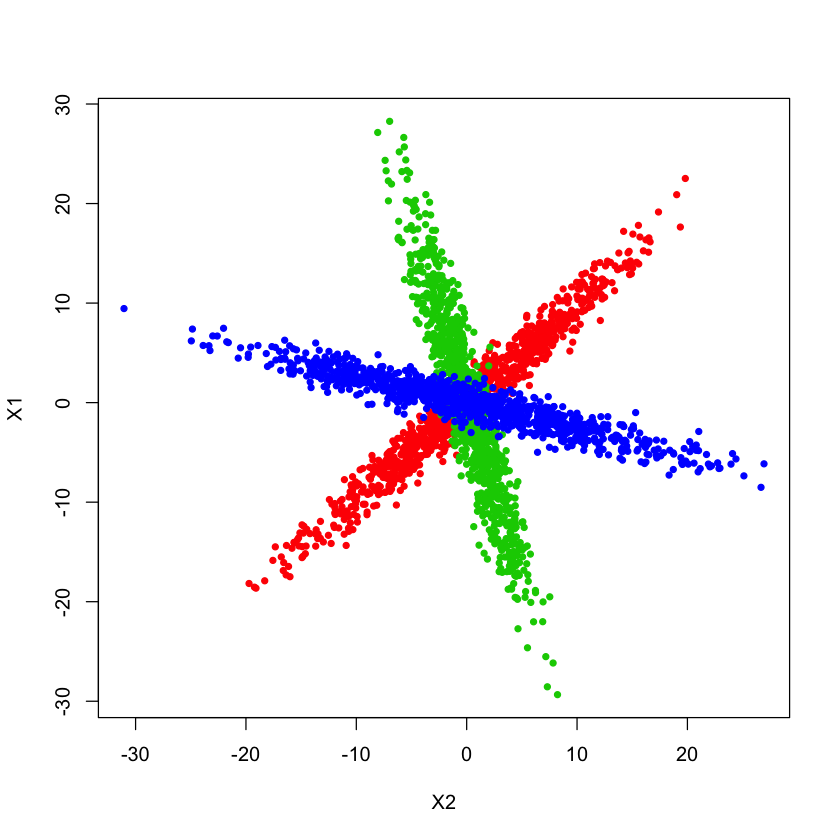

In [19]:
plot(X1 ~ X2, col = as.numeric(Y) + 1, data = datos2, pch = 20)

#### Ajuste del Modelo

In [20]:
fit.datos2 <- vglm(Y ~ X1 + X2, data=datos2, family = multinomial(refLevel = "1"))
summary(fit.datos2)


Call:
vglm(formula = Y ~ X1 + X2, family = multinomial(refLevel = "1"), 
    data = datos2)


Pearson residuals:
                      Min      1Q Median    3Q   Max
log(mu[,2]/mu[,1]) -1.017 -0.9955 -0.366 1.360 1.394
log(mu[,3]/mu[,1]) -1.016 -0.9957 -0.366 1.339 1.497

Coefficients: 
                Estimate Std. Error z value Pr(>|z|)
(Intercept):1 -3.445e-05  4.473e-02  -0.001    0.999
(Intercept):2 -1.012e-03  4.475e-02  -0.023    0.982
X1:1          -3.255e-03  6.389e-03  -0.509    0.610
X1:2          -3.563e-03  6.390e-03  -0.558    0.577
X2:1           9.150e-04  6.424e-03   0.142    0.887
X2:2           5.494e-03  6.423e-03   0.855    0.392

Number of linear predictors:  2 

Names of linear predictors: log(mu[,2]/mu[,1]), log(mu[,3]/mu[,1])

Residual deviance: 6590.459 on 5994 degrees of freedom

Log-likelihood: -3295.23 on 5994 degrees of freedom

Number of iterations: 3 

No Hauck-Donner effect found in any of the estimates

Reference group is level  1  of the response

In [21]:
AIC(fit.datos2)

[1] 6602.459

#### Intervalos de Confianza para Coeficientes

##### Wald

In [22]:
confintvglm(fit.datos2, method = "wald")

,2.5 %,97.5 %
(Intercept):1,-0.087698145,0.087629245
(Intercept):2,-0.088718951,0.086694049
X1:1,-0.015776947,0.009267634
X1:2,-0.016087819,0.008961849
X2:1,-0.011676128,0.013506199
X2:2,-0.007094745,0.018082024


##### Verosimilitud Perfil

In [23]:
confintvglm(fit.datos2, method = "profile")

,2.5 %,97.5 %
(Intercept):1,-0.087712326,0.087643292
(Intercept):2,-0.088735070,0.086706281
X1:1,-0.015787603,0.009267436
X1:2,-0.016098992,0.008961114
X2:1,-0.011679830,0.013512900
X2:2,-0.007090896,0.018096243


#### Intervalo de Confianza para la probabilidad de pertenecer al grupo 2 frente a la de pertencer al 1

In [24]:
# TODO

#### Probabilidades de Pertenencia

In [25]:
prediction.probability.datos2 <- predict(fit.datos2, type="response")

In [26]:
head(prediction.probability.datos2)

1,2,3
0.3327409,0.3361059,0.3311533
0.3333303,0.3336971,0.3329726
0.3323471,0.3338718,0.3337811
0.3328236,0.3358552,0.3313213
0.3326618,0.3329416,0.3343966
0.3321789,0.3331282,0.3346929


#### Predicciones

In [27]:
prediction.datos2 <- as.factor(apply(prediction.probability.datos2, 1, which.max))

In [28]:
summary(prediction.datos2)

1    2    3 
1050  582 1368

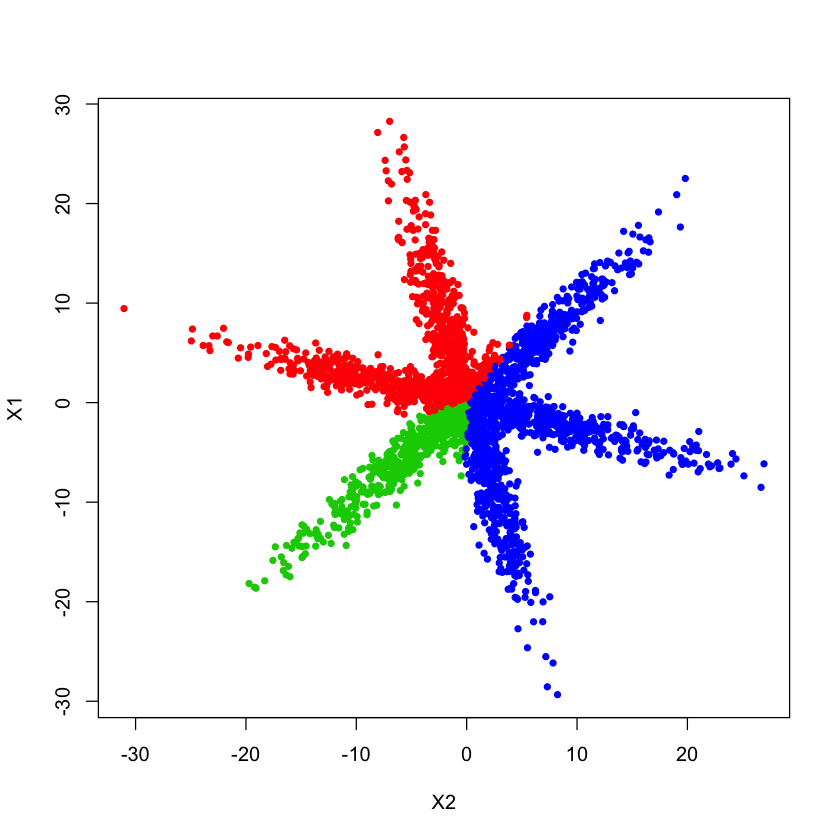

In [29]:
plot(X1 ~ X2, col = as.numeric(prediction.datos2) + 1, data = datos2, pch=20)

#### Otros Modelos

In [30]:
fit.datos2.it <- multinom(Y ~ X1 + X2 + X1:X2, data=datos2)
summary(fit.datos2.it)

# weights:  15 (8 variable)
initial  value 3295.836866 
iter  10 value 1983.997963
iter  20 value 1855.176894
final  value 1853.634160 
converged


Call:
multinom(formula = Y ~ X1 + X2 + X1:X2, data = datos2)

Coefficients:
  (Intercept)          X1         X2      X1:X2
2   0.5341974 0.008356285 0.04006042 -0.6227648
3   0.5356131 0.010989811 0.04606677 -0.6226596

Std. Errors:
  (Intercept)         X1         X2      X1:X2
2  0.09146596 0.04458848 0.04300204 0.03964392
3  0.09145373 0.04458751 0.04300274 0.03964385

Residual Deviance: 3707.268 
AIC: 3723.268 

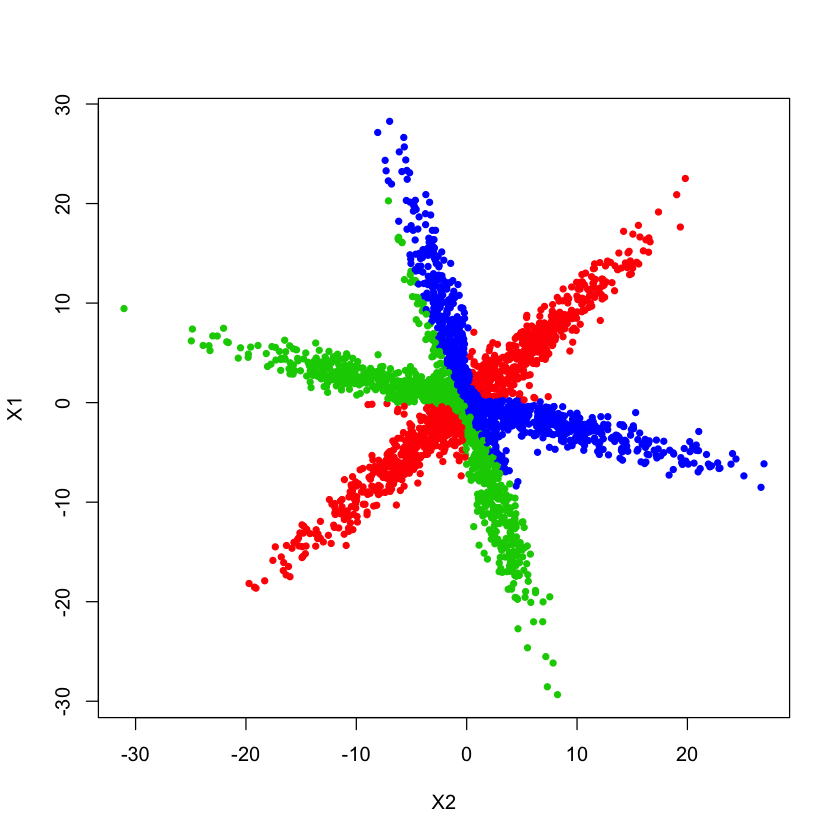

In [31]:
plot(X1 ~ X2, col = as.numeric(predict(fit.datos2.it)) + 1, data = datos2, pch=20)

In [32]:
fit.datos2.it.poly <- multinom(Y ~ poly(X1, 2) + poly(X2, 2) + X1:X2, data=datos2)
summary(fit.datos2.it.poly)

# weights:  21 (12 variable)
initial  value 3295.836866 
iter  10 value 1110.146253
iter  20 value 722.912355
iter  30 value 701.632720
iter  40 value 700.365385
iter  50 value 700.218968
final  value 700.218551 
converged


Call:
multinom(formula = Y ~ poly(X1, 2) + poly(X2, 2) + X1:X2, data = datos2)

Coefficients:
  (Intercept) poly(X1, 2)1 poly(X1, 2)2 poly(X2, 2)1 poly(X2, 2)2      X1:X2
2   0.4640946     59.19326     998.0298    -23.89321    -956.6051 -0.7427611
3   0.3715037    -39.92521    -966.2179     86.17890     975.3845 -0.7653274

Std. Errors:
  (Intercept) poly(X1, 2)1 poly(X1, 2)2 poly(X2, 2)1 poly(X2, 2)2      X1:X2
2   0.9544133     24.56889    103.52407     34.59941     39.22692 0.05377882
3   0.9996047     34.03508     40.50807     25.53498    107.65553 0.05663372

Residual Deviance: 1400.437 
AIC: 1424.437 

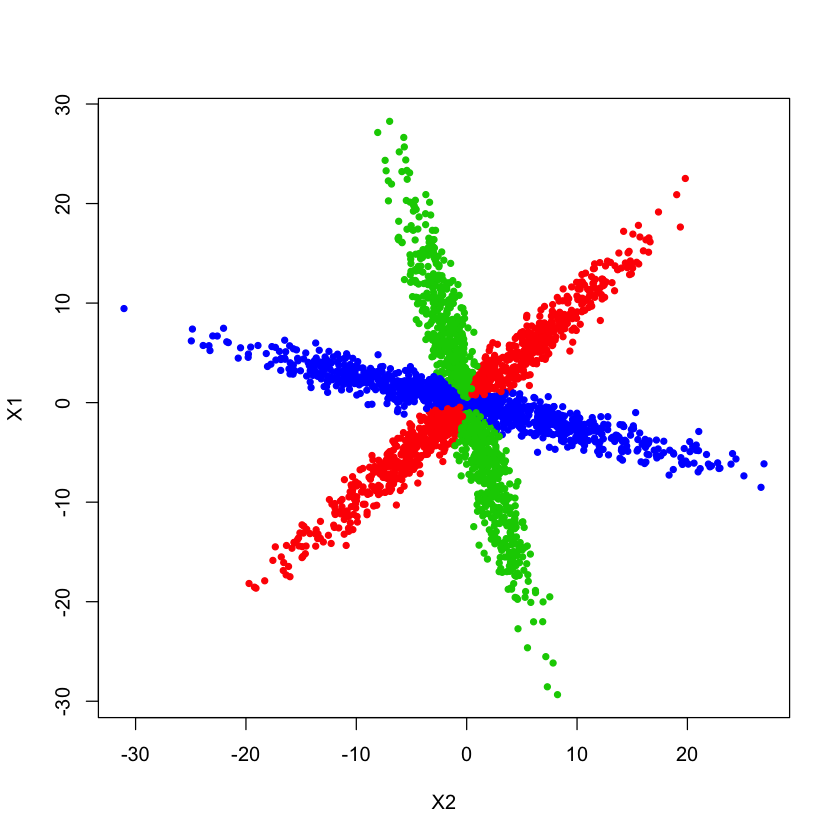

In [33]:
plot(X1 ~ X2, col = as.numeric(predict(fit.datos2.it.poly)) + 1, data = datos2, pch=20)

## Simulación

Una justificación para el modelo de odds proporcionales en la modelización por regresión
logística de la relación entre una variable respuesta cualitativa y una variable explicativa
numérica corresponde a que la variable cualitativa provenga de categorizar una variable
numérica con una distribución logística.

Simula 5000 observaciones de este modelo: distribución logística relacionada linealmente con
una variable numérica y categoriza la variable numérica en 4 grupos. Ajusta una regresión
logística multinomial de odds proporcionales a estos datos y relaciona las estimaciones de los
parámetros con los parámetros simulados.

In [34]:
n <- 5000
k <- 4

In [35]:
(n.sampled <- c(rmultinom(1, size=n,prob=rep(1, 4)/4)))

[1] 1242 1240 1215 1303

In [36]:
GenerateSample <- function(n.sampled, min, max) {
    k <- length(n.sampled)
    ranges <- seq(min, max, length = k + 1)
    l <- sapply(1:k, function(i) {
        cbind(i, runif(n.sampled[i], ranges[i] - 3, ranges[i + 1] + 3))
    })
    df <- as.data.frame(do.call("rbind", l))
    colnames(df) <- c('Y', 'X')
    df$Y <- as.factor(df$Y)
    return(df)
}

In [37]:
ordinal.data <- GenerateSample(n.sampled, 0, 100)

In [38]:
ordinal.data <- cbind(ordinal.data, model.matrix( ~ 0 + Y, ordinal.data))

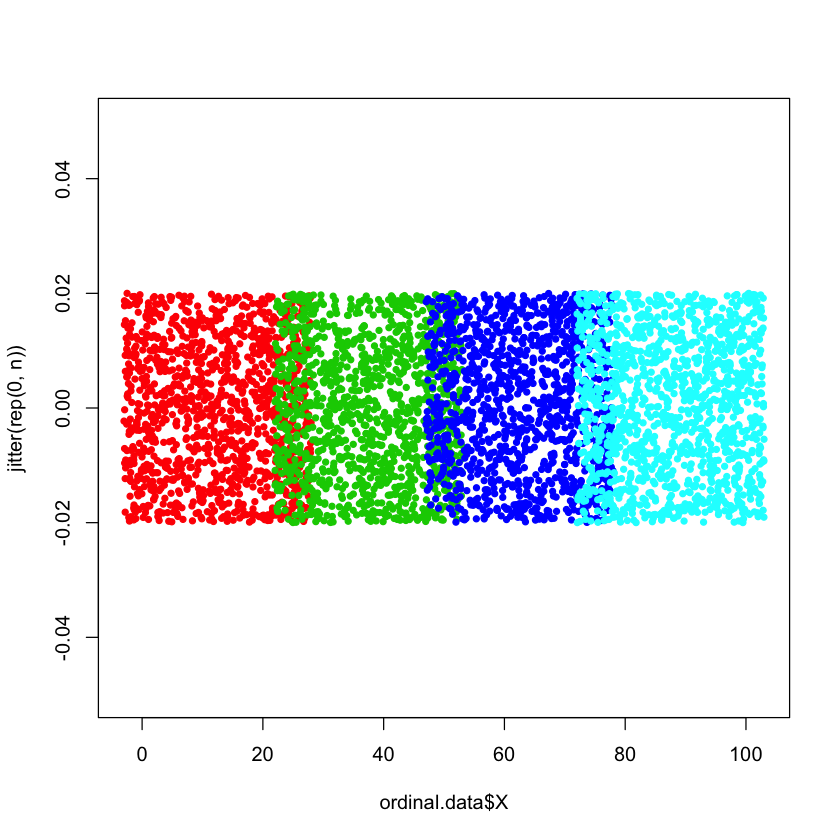

In [39]:
plot(ordinal.data$X, jitter(rep(0,n)), col=as.numeric(ordinal.data$Y) + 1, 
     pch = 20, ylim = c(-0.05, 0.05))

#### Ajuste del Modelo

In [40]:
(fit.ordinal <- polr(Y ~ X,method = "logistic", data=ordinal.data))
summary(fit.ordinal)

Call:
polr(formula = Y ~ X, data = ordinal.data, method = "logistic")

Coefficients:
        X 
0.5126414 

Intercepts:
     1|2      2|3      3|4 
12.87942 25.82201 38.40548 

Residual Deviance: 2439.996 
AIC: 2447.996 


Re-fitting to get Hessian



Call:
polr(formula = Y ~ X, data = ordinal.data, method = "logistic")

Coefficients:
   Value Std. Error t value
X 0.5126    0.01735   29.55

Intercepts:
    Value   Std. Error t value
1|2 12.8794  0.4438    29.0191
2|3 25.8220  0.8758    29.4850
3|4 38.4055  1.3036    29.4615

Residual Deviance: 2439.996 
AIC: 2447.996 

#### Relación de las constantes del modelo con la variable discretizada

La relación entre las constantes $\alpha_j$ estimadas del modelo y las clases generadas es la siguiente: Si dividimos las constantes que "particionan" el espacio en cuatro partes, entre la pendiente $\beta$ ajustada en el modelo, conseguimos el límite superior de las regiones de cada partición. Estos valores pueden ser utilizados en la etapa de predicción para indicar la pertenencia de nuevas observaciones a cada clase, siguiendo la estrategia del modelo logit acumulativo $\mbox{logit} P(Y \le k | x)$.

A continuación se realiza dicho cálculo:

In [41]:
fit.ordinal$zeta / coefficients(fit.ordinal)

1|2      2|3      3|4 
25.12365 50.37052 74.91685

 A continuación se muestran dichas particiones del intervalo junto con las predicciones del modelo:

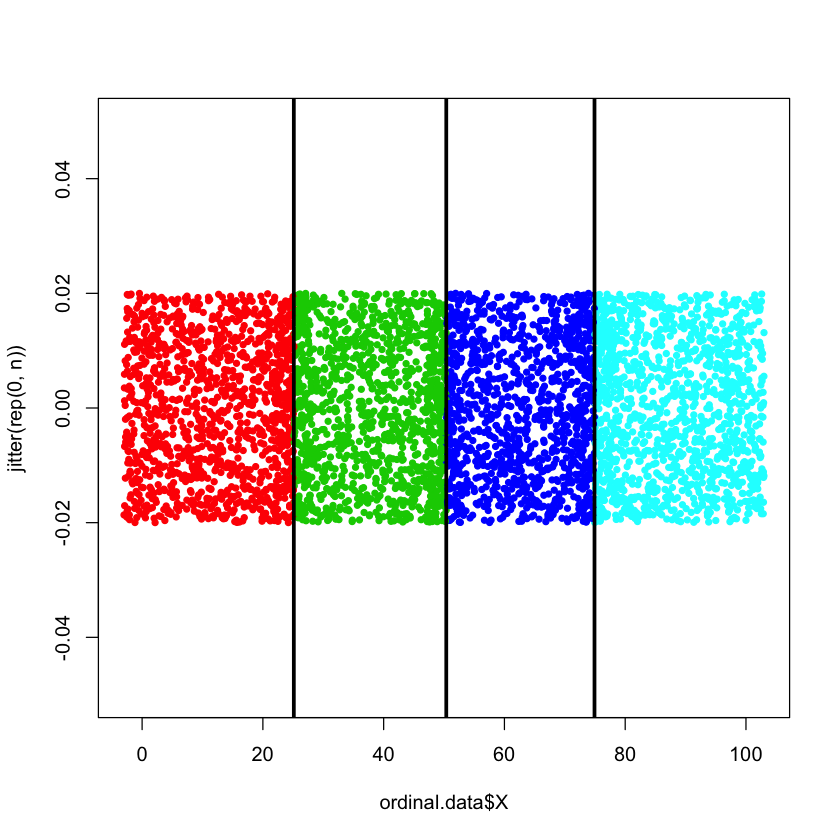

In [42]:
plot(ordinal.data$X, jitter(rep(0,n)), col = as.numeric(predict(fit.ordinal)) + 1, 
     pch = 20, ylim = c(-0.05, 0.05))
abline(v=fit.ordinal$zeta / coefficients(fit.ordinal), lwd = 3)